In [2]:
#Edited by Niklas Brake from original by Gantumur Tsogtgerel, with help from Tuguldur Sukhbold
import numpy as np
import matplotlib.pyplot as plt
import random as rn

We study the effect of inexact arithmetic on computation of the exponential series

$$
e^x = 1 + x + \frac{x^2}2 + \frac{x^3}{3!} + \ldots .
$$

which is approximated by the Taylor polynomial

$$
T_n(x) = 1 + x + \frac{x^2}2 + \ldots \frac{x^n}{n!} .
$$

Each term of the Taylor polynomial is computed with random error, 
uniformly distributed with relative amplitude $\varepsilon$.
We can think of $\varepsilon$ as modeling the machine precision.
A typical choice below is $\varepsilon=0.1$.
This of course greatly exaggaretes roundoff errors, but illustrates the phenomenon nicely.
In this setting, the built-in computation of $e^x$ can be taken as exact.


* $\texttt{expser}(n,x,\varepsilon)$ computes $T_n(x)$ with each of its term having random error, 
uniformly distributed with relative amplitude $\varepsilon$.
* $\texttt{expserlist}(n,xlist,\varepsilon)$ is a version of $\texttt{expser}(n,x,\varepsilon)$ that works with a list of $x$.
* The next 3 functions work with lists of $x$, $n$, and $\varepsilon$, respectively, 
but they all compute $e^x-T_n(x)$, where $T_n(x)$ has the aforementioned perturbation. 

# Preliminaries



In [4]:
def expser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for exp
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    b=1.
    y=b
    for i in range(1,n+1):
        b*=float(x)/i
        r=2*eps*rn.random()-eps
        y+=b*(1.+r)
    return y

In [5]:
def expserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(expser(n,x,eps))
    return ylist

In [6]:
def errxlist(n,xlist,eps):
#difference between Tn(x) and e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [7]:
def errelist(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [8]:
def errnlist(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

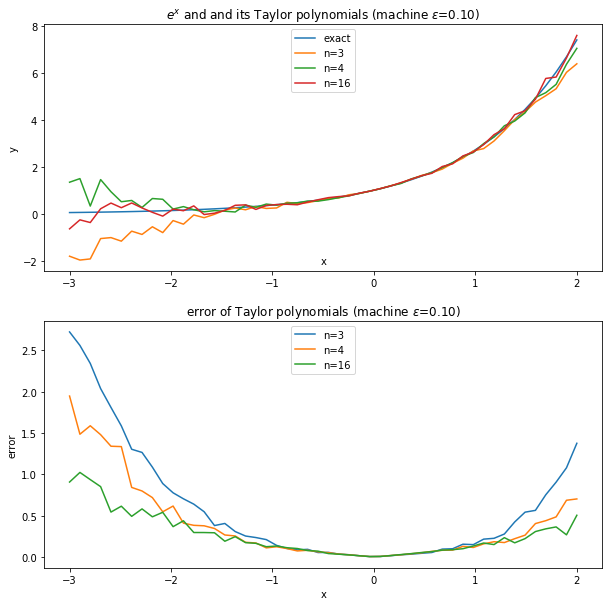

In [9]:
xlist = np.linspace(-3, 2, 50)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.exp(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(errxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(errxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$e^x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

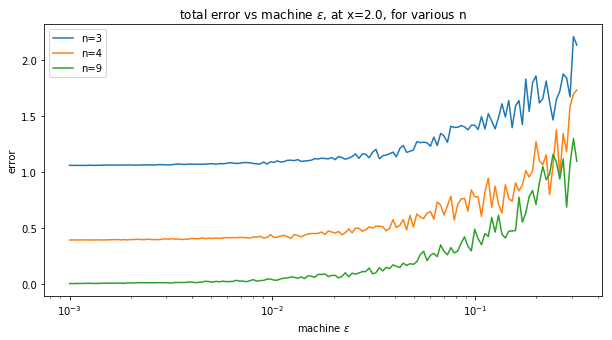

In [10]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

# Investigation of error vs *n* as a function of $\varepsilon$ and *x*

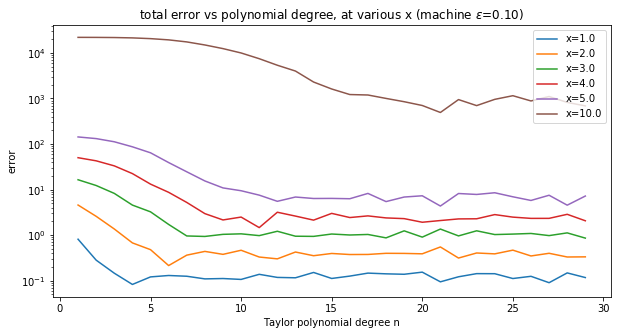

In [14]:
xlist = [1,2,3,4,5,10]
nlist=range(1,30)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

As we increase x, the threshold becomes higher. This makes sense, seeing as the Taylor series, which our Taylor polynomial is approximating, is centered at 0. Hence, lower order estimate are only good approximations for x close to 0.



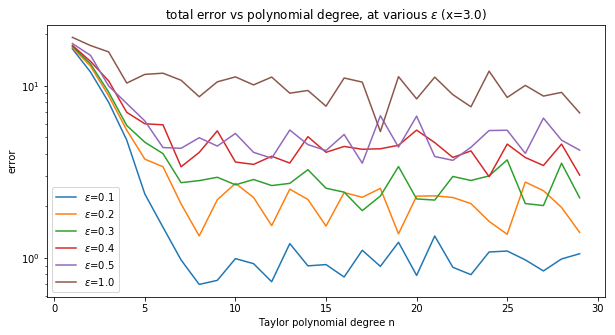

In [19]:
x = 3
nlist=range(1,30)
epslist=[0.1,0.2,0.3,0.4,0.5,1]
kmax=20

plt.figure(figsize=(10,5))
for eps in epslist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='$\epsilon$=%.1f'%eps)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various $\epsilon$ (x=%.1f)'%x)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

Our steady state error increases with increasing machine $\varepsilon$. Again this is expected, seeing as increasing $\varepsilon$ will induce more error in the computation of each term, and hence the polynomial will be a worse approximation of $e^x$.

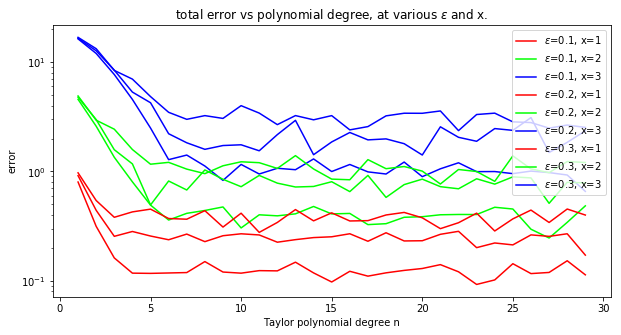

In [42]:
xlist = [1,2,3]
nlist=range(1,30)
epslist=[0.1,0.2,0.3]
kmax=20

plt.figure(figsize=(10,5))

for eps in epslist:
    for x in xlist:
        y=np.abs(errnlist(nlist,x,eps))
        for k in range(1,kmax):
            z=np.abs(errnlist(nlist,x,eps))
            y=np.maximum(y,z)
#       Cycle color so that all x have same color and all eps with same x have different colors
        clr = [0,0,0]
        clr[x-1] = 1
        plt.plot(nlist,y,color=clr,label='$\epsilon$=%.1f, x=%d' %(eps,x))

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various $\epsilon$ and x.')
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

Clearly both $\varepsilon$ and x affects the steady state total error. However, it seems that $\varepsilon$ plays a larger role in determining the threshold at which total error levels off with increasing n.

# Edited Code to Investigate Relative Error
## Preliminaries

In [44]:
def rerrxlist(n,xlist,eps):
# Relative error: |T(x)-e^x|/e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(abs(expser(n,x,eps)-np.exp(x))/np.exp(x))
    return yy

def rerrelist(n,x,elist):
# Relative error: |T(x)-e^x|/e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(abs(expser(n,x,eps)-np.exp(x))/np.exp(x))
    return yy

def rerrnlist(nlist,x,eps):
# Relative error: |T(x)-e^x|/e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(abs(expser(n,x,eps)-np.exp(x))/np.exp(x))
    return yy

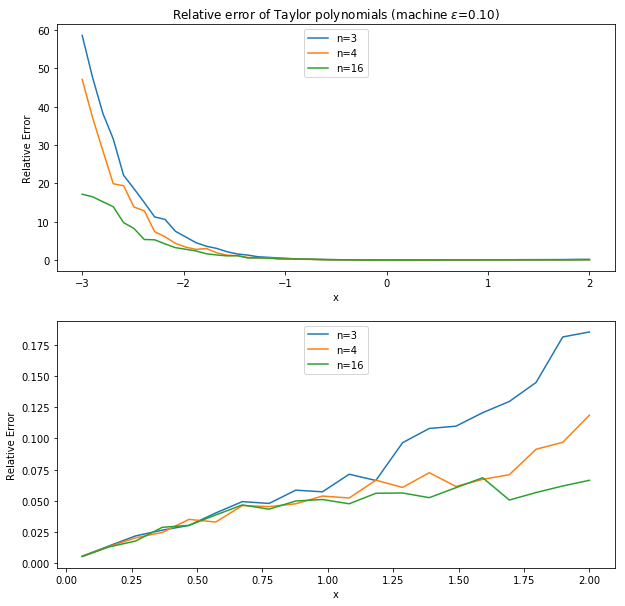

In [63]:
xlist = np.linspace(-3, 2, 50)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for n in nlist:
#   Replace error functions with relative error functions
    y=np.abs(rerrxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(rerrxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax1.plot(xlist,y,label='n=%d'%n)
    ax2.plot(xlist[30:50],y[30:50],label='n=%d'%n)

ax1.set_title(r'Relative error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.set_xlabel('x')
ax1.set_ylabel('Relative Error')
ax1.legend(loc="upper center")
ax2.set_xlabel('x')
ax2.set_ylabel('Relative Error')
ax2.legend(loc="upper center")
plt.show()

Clearly for negative values of x, $e^x$ gets close to zero, making the relative error very high. To investigate the positive values, we zoom in on the values [0,2]. Here we see a close to a linear relationship between x and relative error. In the previous plot, the total error increased superlinearly. The exponential growth in the denomenator counteracts this.

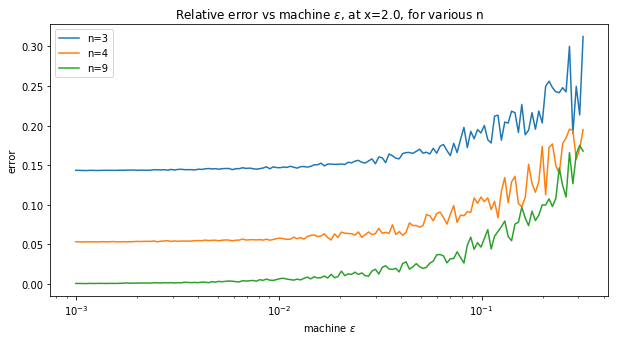

In [64]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
#   Replace total error with relative error function
    y=np.abs(rerrelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(rerrelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'Relative error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

All this data is taken at the same x value, hence $e^x$ is the same. Therefore, this data is simply a scaled copy of the total error results.
## Investigation of `relative` error vs *n* as a function of $\varepsilon$ and *x*

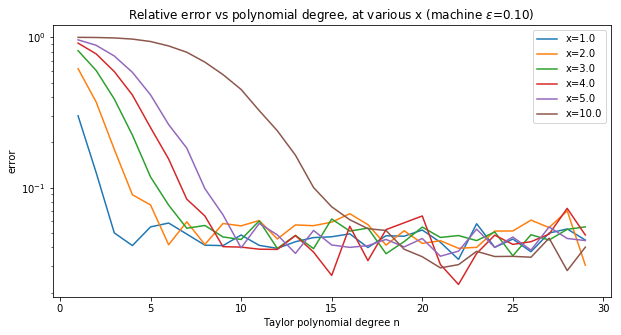

In [66]:
xlist = [1,2,3,4,5,10]
nlist=range(1,30)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
#   Replace function with relative error
    y=np.abs(rerrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(rerrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'Relative error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

The steady-state relative error with respect to n is mostly the same for all x. Some evidence that higher x have a lower relative error. This is because the total error does not increase as fast as $e^x$ does with increasing x. The speed of convergence of error with respect to n does not seem to be affect, however. This makes sense because convergence of $|\tilde{T_n} - e^x|$ is not affected by scaling.

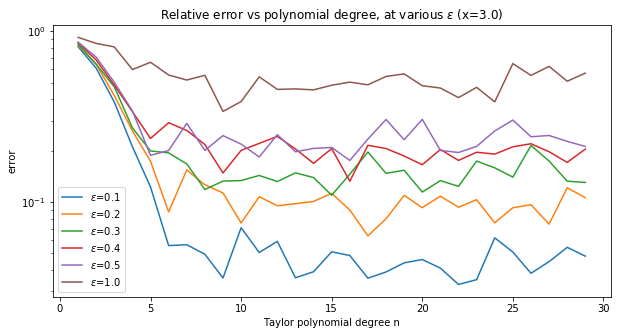

In [67]:
x = 3
nlist=range(1,30)
epslist=[0.1,0.2,0.3,0.4,0.5,1]
kmax=20

plt.figure(figsize=(10,5))
for eps in epslist:
#   Replace functions with relative error
    y=np.abs(rerrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(rerrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='$\epsilon$=%.1f'%eps)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'Relative error vs polynomial degree, at various $\epsilon$ (x=%.1f)'%x)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

This appears unaffected. This makes sense, because we are dividing all data points by the same number, given that all data points are at the same x value, hence same value of $e^x$.

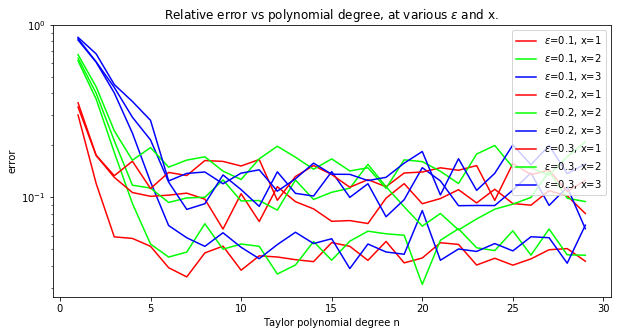

In [70]:
xlist = [1,2,3]
nlist=range(1,30)
epslist=[0.1,0.2,0.3]
kmax=20

plt.figure(figsize=(10,5))

for eps in epslist:
    for x in xlist:
#       Error replaced with relative error
        y=np.abs(rerrnlist(nlist,x,eps))
        for k in range(1,kmax):
            z=np.abs(rerrnlist(nlist,x,eps))
            y=np.maximum(y,z)
#       Cycle color so that all x have same color and all eps with same x have different colors
        clr = [0,0,0]
        clr[x-1] = 1
        plt.plot(nlist,y,color=clr,label='$\epsilon$=%.1f, x=%d' %(eps,x))

plt.yscale('log')
#plt.xscale('log')
plt.title(r'Relative error vs polynomial degree, at various $\epsilon$ and x.')
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

We see seperation across different $\varepsilon$ values but not different x values. This should be expected considering the previous two plots.